In [1]:
import numpy as np
from easy21 import Easy21
from agent import MCControl, Sarsa
import matplotlib.pyplot as plt

Iteration  100000:  win% =  50.633
Iteration  200000:  win% =  51.245
Iteration  300000:  win% =  51.455
Iteration  400000:  win% =  51.705
Iteration  500000:  win% =  51.799
Iteration  600000:  win% =  51.853
Iteration  700000:  win% =  51.963
Iteration  800000:  win% =  52.018
Iteration  900000:  win% =  52.067
Iteration 1000000:  win% =  52.100


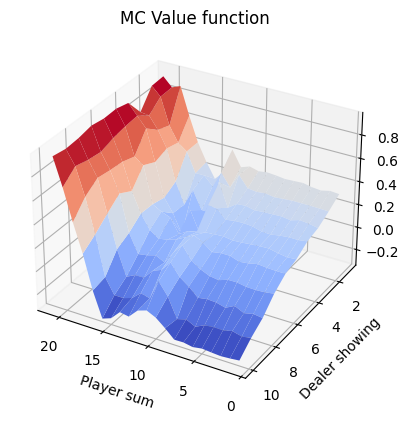

In [2]:
monte_carlo_agent = MCControl(no=100)
env = Easy21()

N = int(1e6)
for idx in range(N):
    episode = monte_carlo_agent.train(env)
    if (idx + 1) % (N // 10) == 0:
        print(f"Iteration {(idx + 1):7d}:  win% = {100 * monte_carlo_agent.wins / (idx + 1) : .3f}")
monte_carlo_agent.plot_value_function("MC Value function")

Iteration  100000:  win% =  50.518
Iteration  200000:  win% =  51.113
Iteration  300000:  win% =  51.406
Iteration  400000:  win% =  51.555
Iteration  500000:  win% =  51.642
Iteration  600000:  win% =  51.723
Iteration  700000:  win% =  51.803
Iteration  800000:  win% =  51.824
Iteration  900000:  win% =  51.839
Iteration 1000000:  win% =  51.862


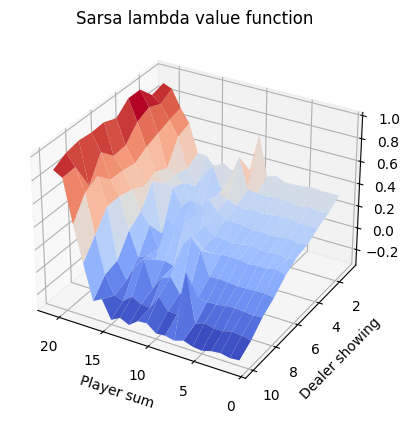

In [3]:
sarsa_agent = Sarsa(no=100, lam=1)
env = Easy21()

N = int(1e6)
for idx in range(N):
    episode = sarsa_agent.train(env)
    if (idx + 1) % (N // 10) == 0:
        print(f"Iteration {(idx + 1):7d}:  win% = {100 * sarsa_agent.wins / (idx + 1) : .3f}")
sarsa_agent.plot_value_function("Sarsa lambda value function")

### MSE w.r.t monte carlo

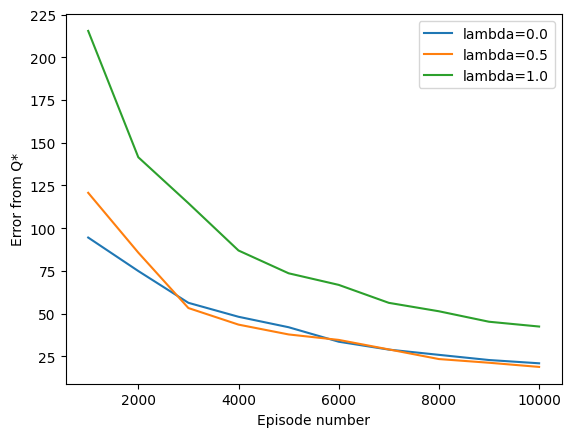

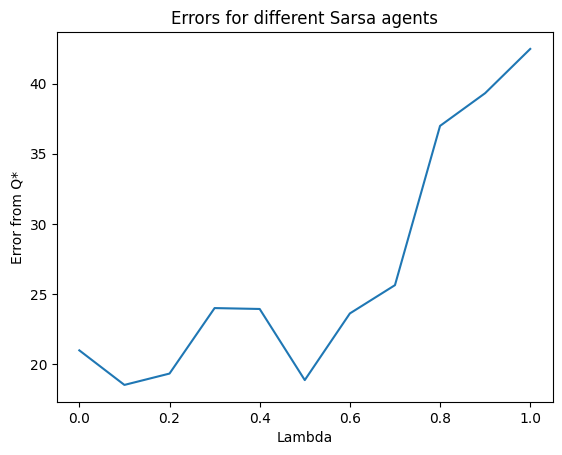

In [4]:
def get_error(m1, m2):
    return ((m1.Q - m2.Q) ** 2).sum()


env = Easy21()
errs = []
lambda_values = np.arange(0, 1.1, 0.1)
plt.figure()
for lam in lambda_values:
    # train for 1000 episodes
    agent = Sarsa(lam=lam)
    episode_number = []
    episode_errors = []
    for idx in range(10000):
        agent.train(env)
        if (idx + 1) % 1000 == 0:
            err = get_error(agent, monte_carlo_agent)
            episode_errors.append(err)
            episode_number.append(idx + 1)
    
    if lam in (0, 0.5, 1):
        plt.plot(episode_number, episode_errors, label=f"lambda={lam}")
    errs.append(err)
plt.xlabel("Episode number")
plt.ylabel("Error from Q*")
plt.legend()
plt.show()

plt.figure()
plt.plot(lambda_values, errs)
plt.xlabel("Lambda")
plt.ylabel("Error from Q*")
plt.title("Errors for different Sarsa agents")
plt.show()